In [1]:
#import mysql.connector
import pymysql
import pymysql.cursors
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
conn = pymysql.connect(host='127.0.0.1',port=8889,user='root',password='root',db='gingko')
#conn = mysql.connector.connect(user='root', password=, database='gingko', use_unicode=True)
cursor = conn.cursor()
cursor.execute('select count(*) from web_pages')

1

In [3]:
values = cursor.fetchall()

In [4]:
values

((3058,),)

In [5]:
from counter import get_img_number, get_ads_number

In [6]:
cursor.execute('select site, is_fake, html from web_pages')
webs = cursor.fetchall()

In [7]:
len(webs)

3058

In [8]:
imgs = [[], []]
ads = [[], []]
for w in webs:
    imgs[w[1]].append(get_img_number(w[2]))
    ads[w[1]].append(get_ads_number(w[2]))

In [9]:
"""
#from spell_checker import get_spell_score
#from reading_level import get_reading_level
from yd_social import social_media_score, citation_score

#spell_score = [[], []]
#reading_level = [[], []]
_social_media_score = [[], []]
_citation_score = [[], []]
for w in webs:
    #spell_score[w[1]].append(get_spell_score(w[2]))
    #reading_level[w[1]].append(get_reading_level(w[2]))
    _social_media_score[w[1]].append(social_media_score(w[2]))
    _citation_score[w[1]].append(citation_score(w[2]))
"""

'\n#from spell_checker import get_spell_score\n#from reading_level import get_reading_level\nfrom yd_social import social_media_score, citation_score\n\n#spell_score = [[], []]\n#reading_level = [[], []]\n_social_media_score = [[], []]\n_citation_score = [[], []]\nfor w in webs:\n    #spell_score[w[1]].append(get_spell_score(w[2]))\n    #reading_level[w[1]].append(get_reading_level(w[2]))\n    _social_media_score[w[1]].append(social_media_score(w[2]))\n    _citation_score[w[1]].append(citation_score(w[2]))\n'

(array([1.982e+03, 1.080e+02, 1.500e+01, 3.000e+00, 8.000e+01, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  0. ,  30.7,  61.4,  92.1, 122.8, 153.5, 184.2, 214.9, 245.6,
        276.3, 307. ]),
 <a list of 10 Patch objects>)

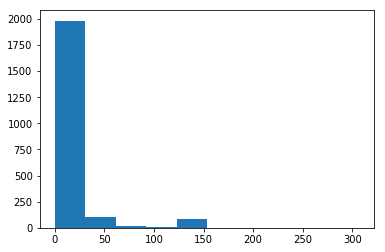

In [10]:
plt.hist(imgs[0])

(array([838.,  16.,   6.,   4.,   1.,   1.,   1.,   0.,   0.,   1.]),
 array([   0. ,  195.9,  391.8,  587.7,  783.6,  979.5, 1175.4, 1371.3,
        1567.2, 1763.1, 1959. ]),
 <a list of 10 Patch objects>)

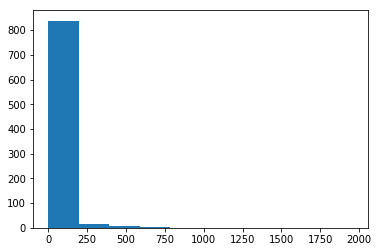

In [11]:
plt.hist(imgs[1])

(array([2.168e+03, 5.000e+00, 1.400e+01, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([ 0. ,  4.7,  9.4, 14.1, 18.8, 23.5, 28.2, 32.9, 37.6, 42.3, 47. ]),
 <a list of 10 Patch objects>)

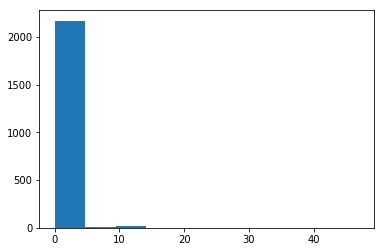

In [12]:
plt.hist(ads[0])

(array([727.,  40.,  12.,  84.,   2.,   1.,   1.,   0.,   0.,   1.]),
 array([ 0.,  8., 16., 24., 32., 40., 48., 56., 64., 72., 80.]),
 <a list of 10 Patch objects>)

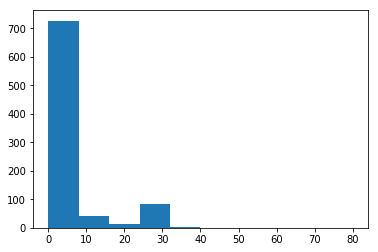

In [13]:
plt.hist(ads[1])

In [39]:
import pandas as pd
import numpy as np

def make_dataframe(pos_samples, neg_samples):
    list_for_df = []
    for pos_sample in pos_samples:
        list_for_df.append([pos_sample, 1, 1])
    for neg_sample in neg_samples:
        list_for_df.append([neg_sample, 0, 1])
    list_for_df = np.array(list_for_df)
    return pd.DataFrame(data=list_for_df, columns=['val', 'isfake', '_'])

In [40]:
our_df = make_dataframe(ads[1], ads[0])
our_df

,val,isfake,_
0,0,1,1
1,0,1,1
2,0,1,1
3,0,1,1
4,0,1,1
5,0,1,1
6,0,1,1
7,0,1,1
8,0,1,1
9,0,1,1


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

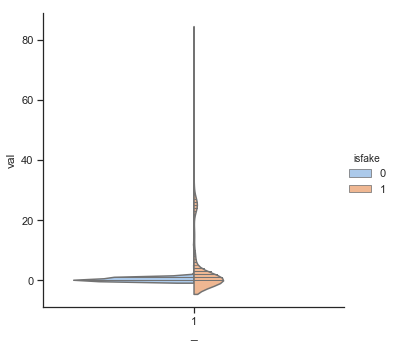

In [45]:
sns.catplot(x="_", y="val", hue="isfake",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=our_df)